In [712]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [713]:
df=pd.read_csv("/content/Red_wine.csv")

In [714]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0


In [715]:
df.quality.unique()

array([ 5.,  6.,  7.,  4., nan,  8.,  3.])

In [716]:
df.isna().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide     True
density                 False
pH                       True
sulphates               False
alcohol                 False
quality                  True
dtype: bool

In [717]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    1
density                 0
pH                      1
sulphates               0
alcohol                 0
quality                 1
dtype: int64

In [718]:
df[df["quality"].isna()]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
123,8.0,0.71,0.0,2.6,0.08,11.0,34.0,0.9976,3.44,0.53,9.5,NaN


In [719]:
df[df["pH"].isna()]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
184,6.7,0.62,0.21,1.9,0.079,8.0,62.0,0.997,NaN,0.58,9.3,6.0


In [720]:
df[df["total sulfur dioxide"].isna()]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
9,7.5,0.5,0.36,6.1,0.071,17.0,NaN,0.9978,3.35,0.8,10.5,5.0


In [721]:
df.corr().quality.sort_values(ascending=False)

quality                 1.000000
alcohol                 0.475943
sulphates               0.251118
citric acid             0.225867
pH                      0.133961
fixed acidity           0.123987
residual sugar          0.013756
free sulfur dioxide    -0.050899
chlorides              -0.129011
density                -0.174741
total sulfur dioxide   -0.184699
volatile acidity       -0.390258
Name: quality, dtype: float64

<Axes: >

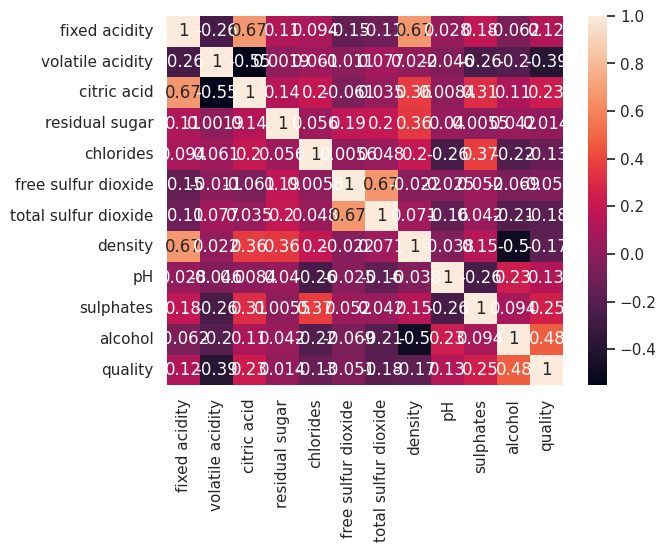

In [722]:
sns.heatmap(df.corr(),annot=True)

In [723]:
#Handle null values
df.dropna(inplace=True)

In [724]:
df.isna().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

Text(0, 0.5, 'alcohol')

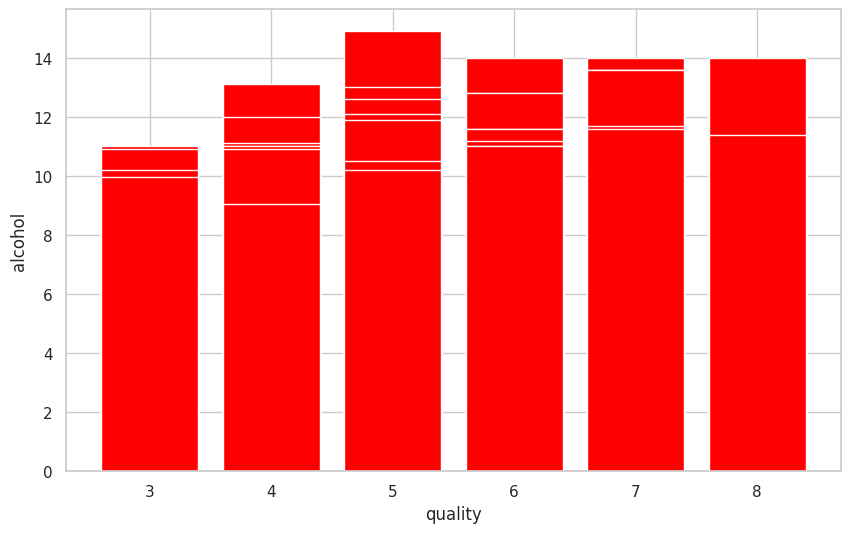

In [725]:
plt.figure(figsize=[10,6])
plt.bar(df['quality'],df['alcohol'],color='red')
plt.xlabel('quality')
plt.ylabel('alcohol')

In [726]:
#Alcohol content of 5 is greater

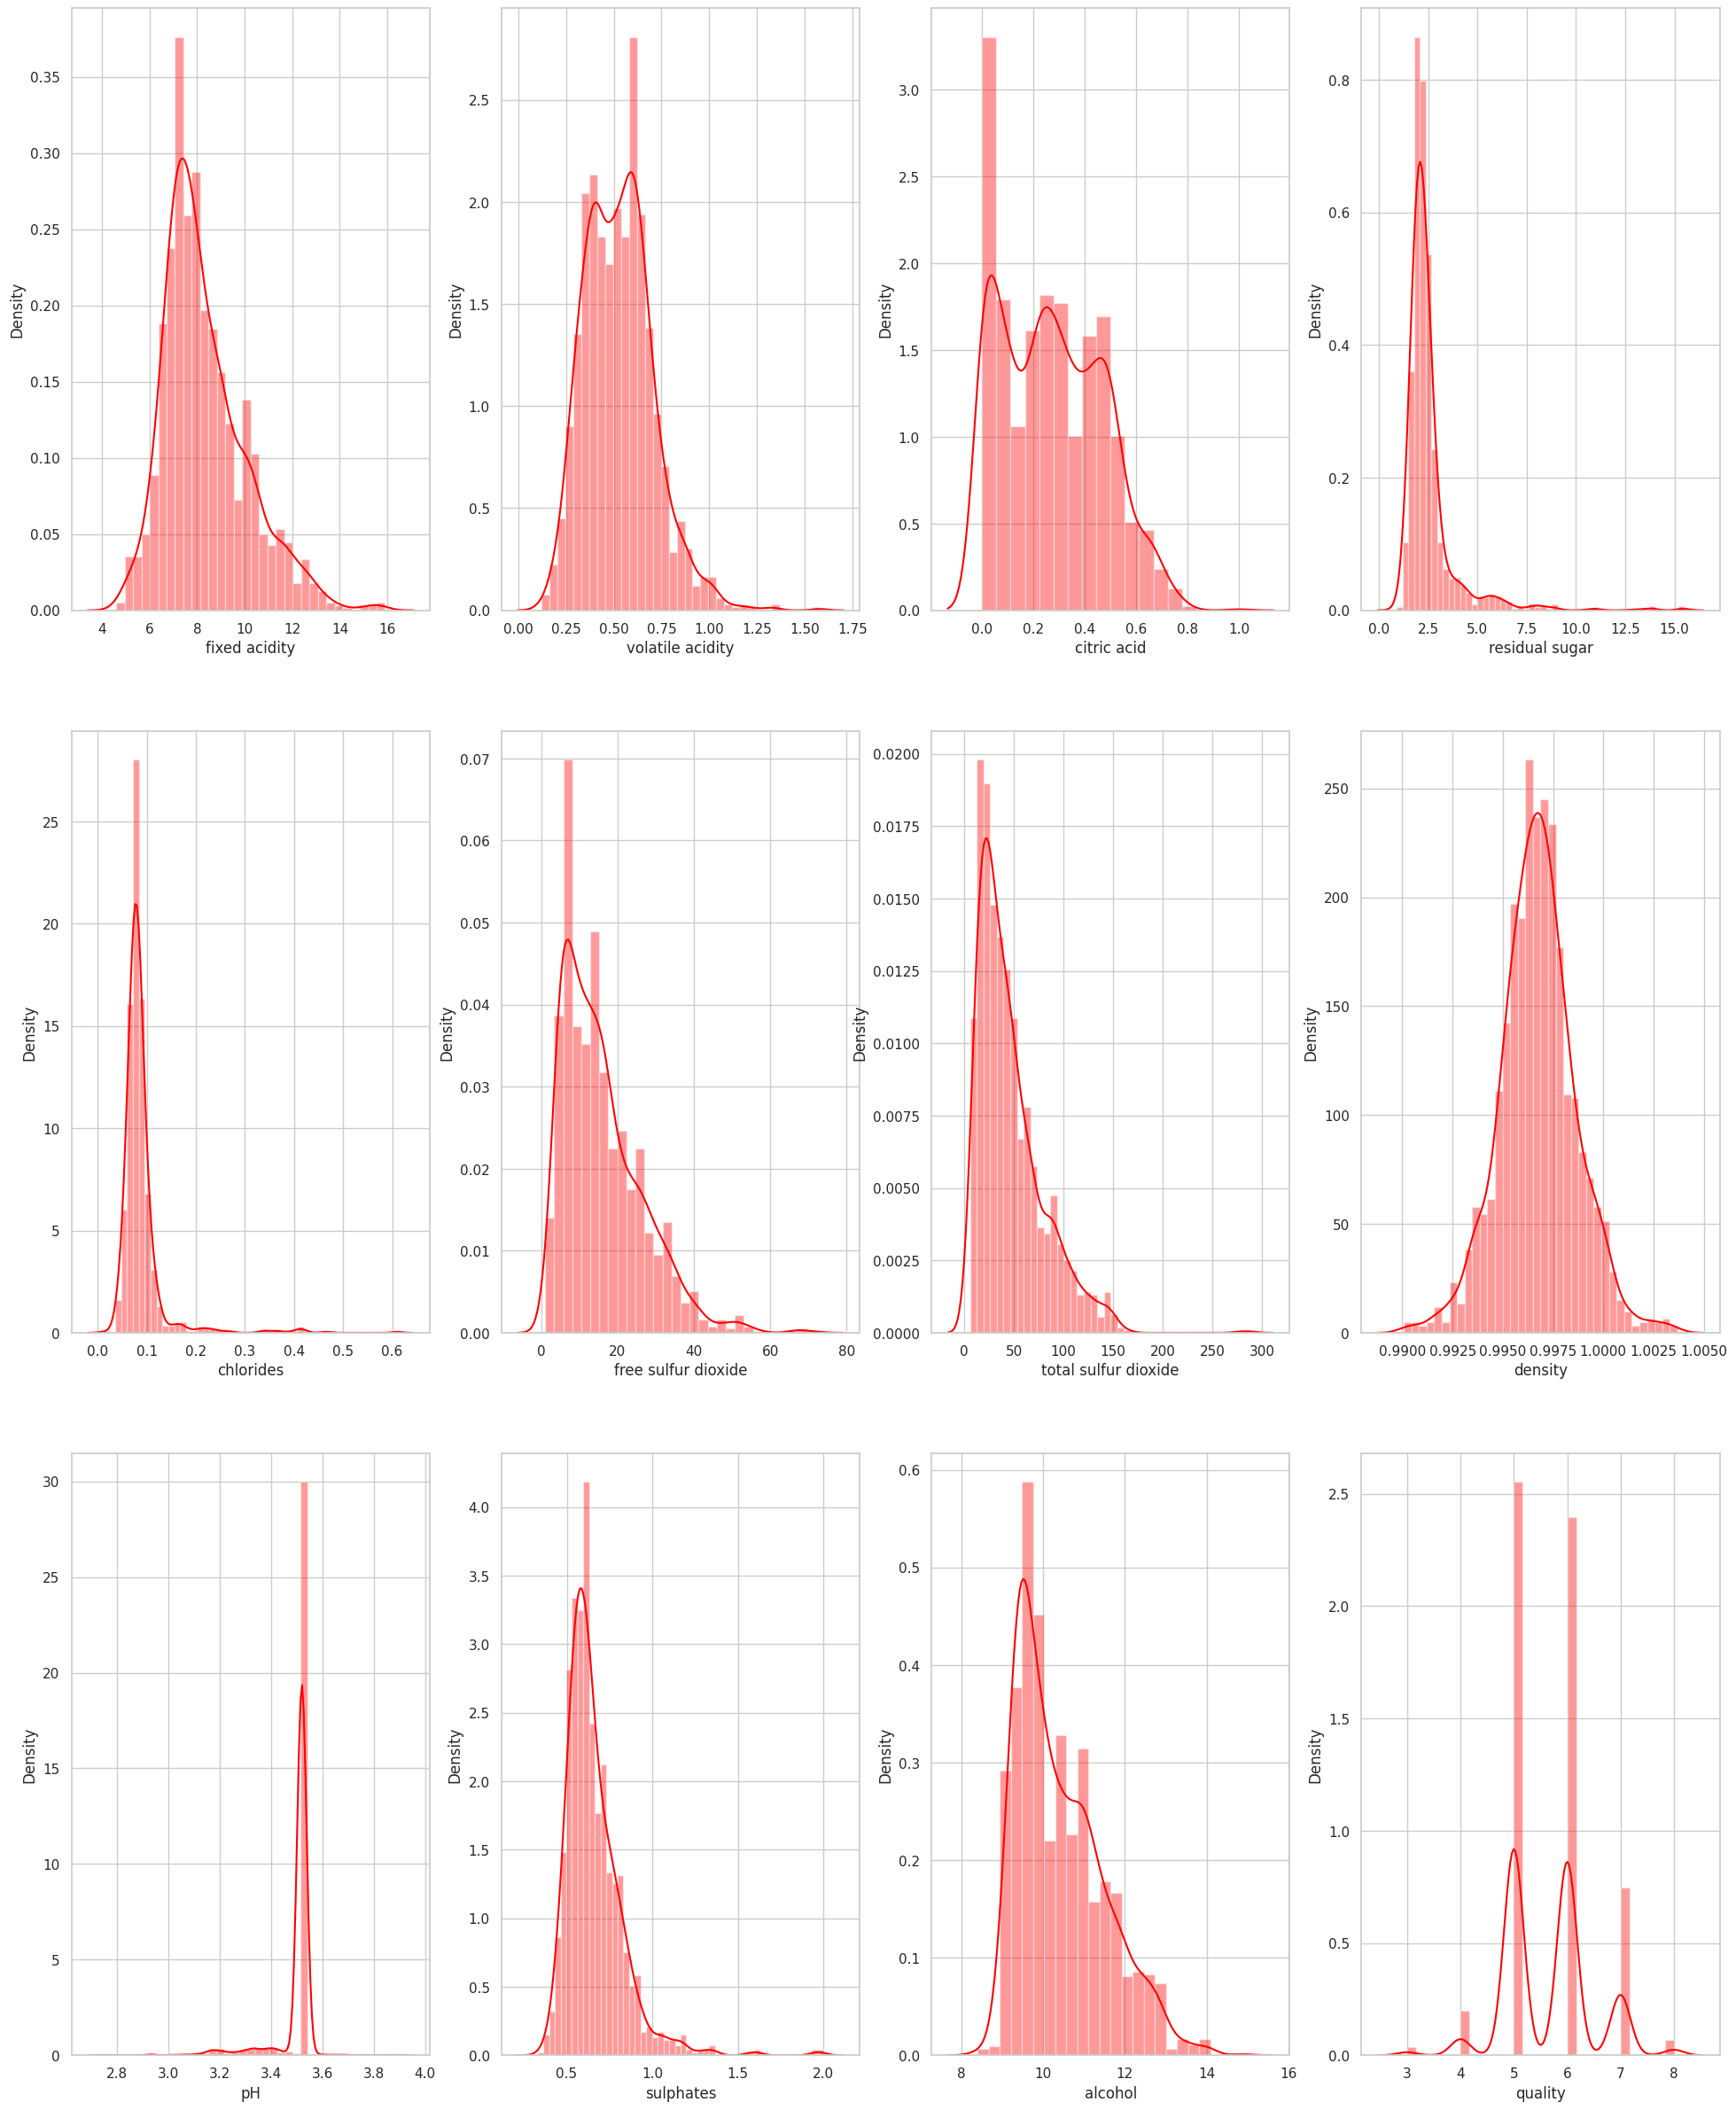

In [727]:
color = sns.color_palette("pastel")
fig, ax1 = plt.subplots(3, 4, figsize=(24, 30))
k = 0
columns = list(df.columns)

# Iterate over subplots and columns to create distplots
for i in range(3):
    for j in range(4):
        if k < len(columns):
            sns.distplot(df[columns[k]], ax=ax1[i][j], color='red')
            k += 1

plt.show()

In [728]:
# We see that some of our columns are highly skewed towards right. These columns
# include Residual Sugar, Chlorides, Free Sulphur Dioxide, Total Sulphur Dioxide,
# and Sulphates. So we need to tranform it. Applying a log transfrom will solve
# the problem!

In [729]:
def log_transform(col):
    return np.log(col[0])

df['residual sugar'] = df[['residual sugar']].apply(log_transform, axis=1)
df['chlorides'] = df[['chlorides']].apply(log_transform, axis=1)
df['free sulfur dioxide'] = df[['free sulfur dioxide']].apply(log_transform, axis=1)
df['total sulfur dioxide'] = df[['total sulfur dioxide']].apply(log_transform, axis=1)
df['sulphates'] = df[['sulphates']].apply(log_transform, axis=1)

In [730]:
#pH is skewed towards left. Hence we fix that using exponential transform.

In [731]:
def exp_transform(value):
    return np.exp(value)

df['pH'] = df['pH'].apply(exp_transform)

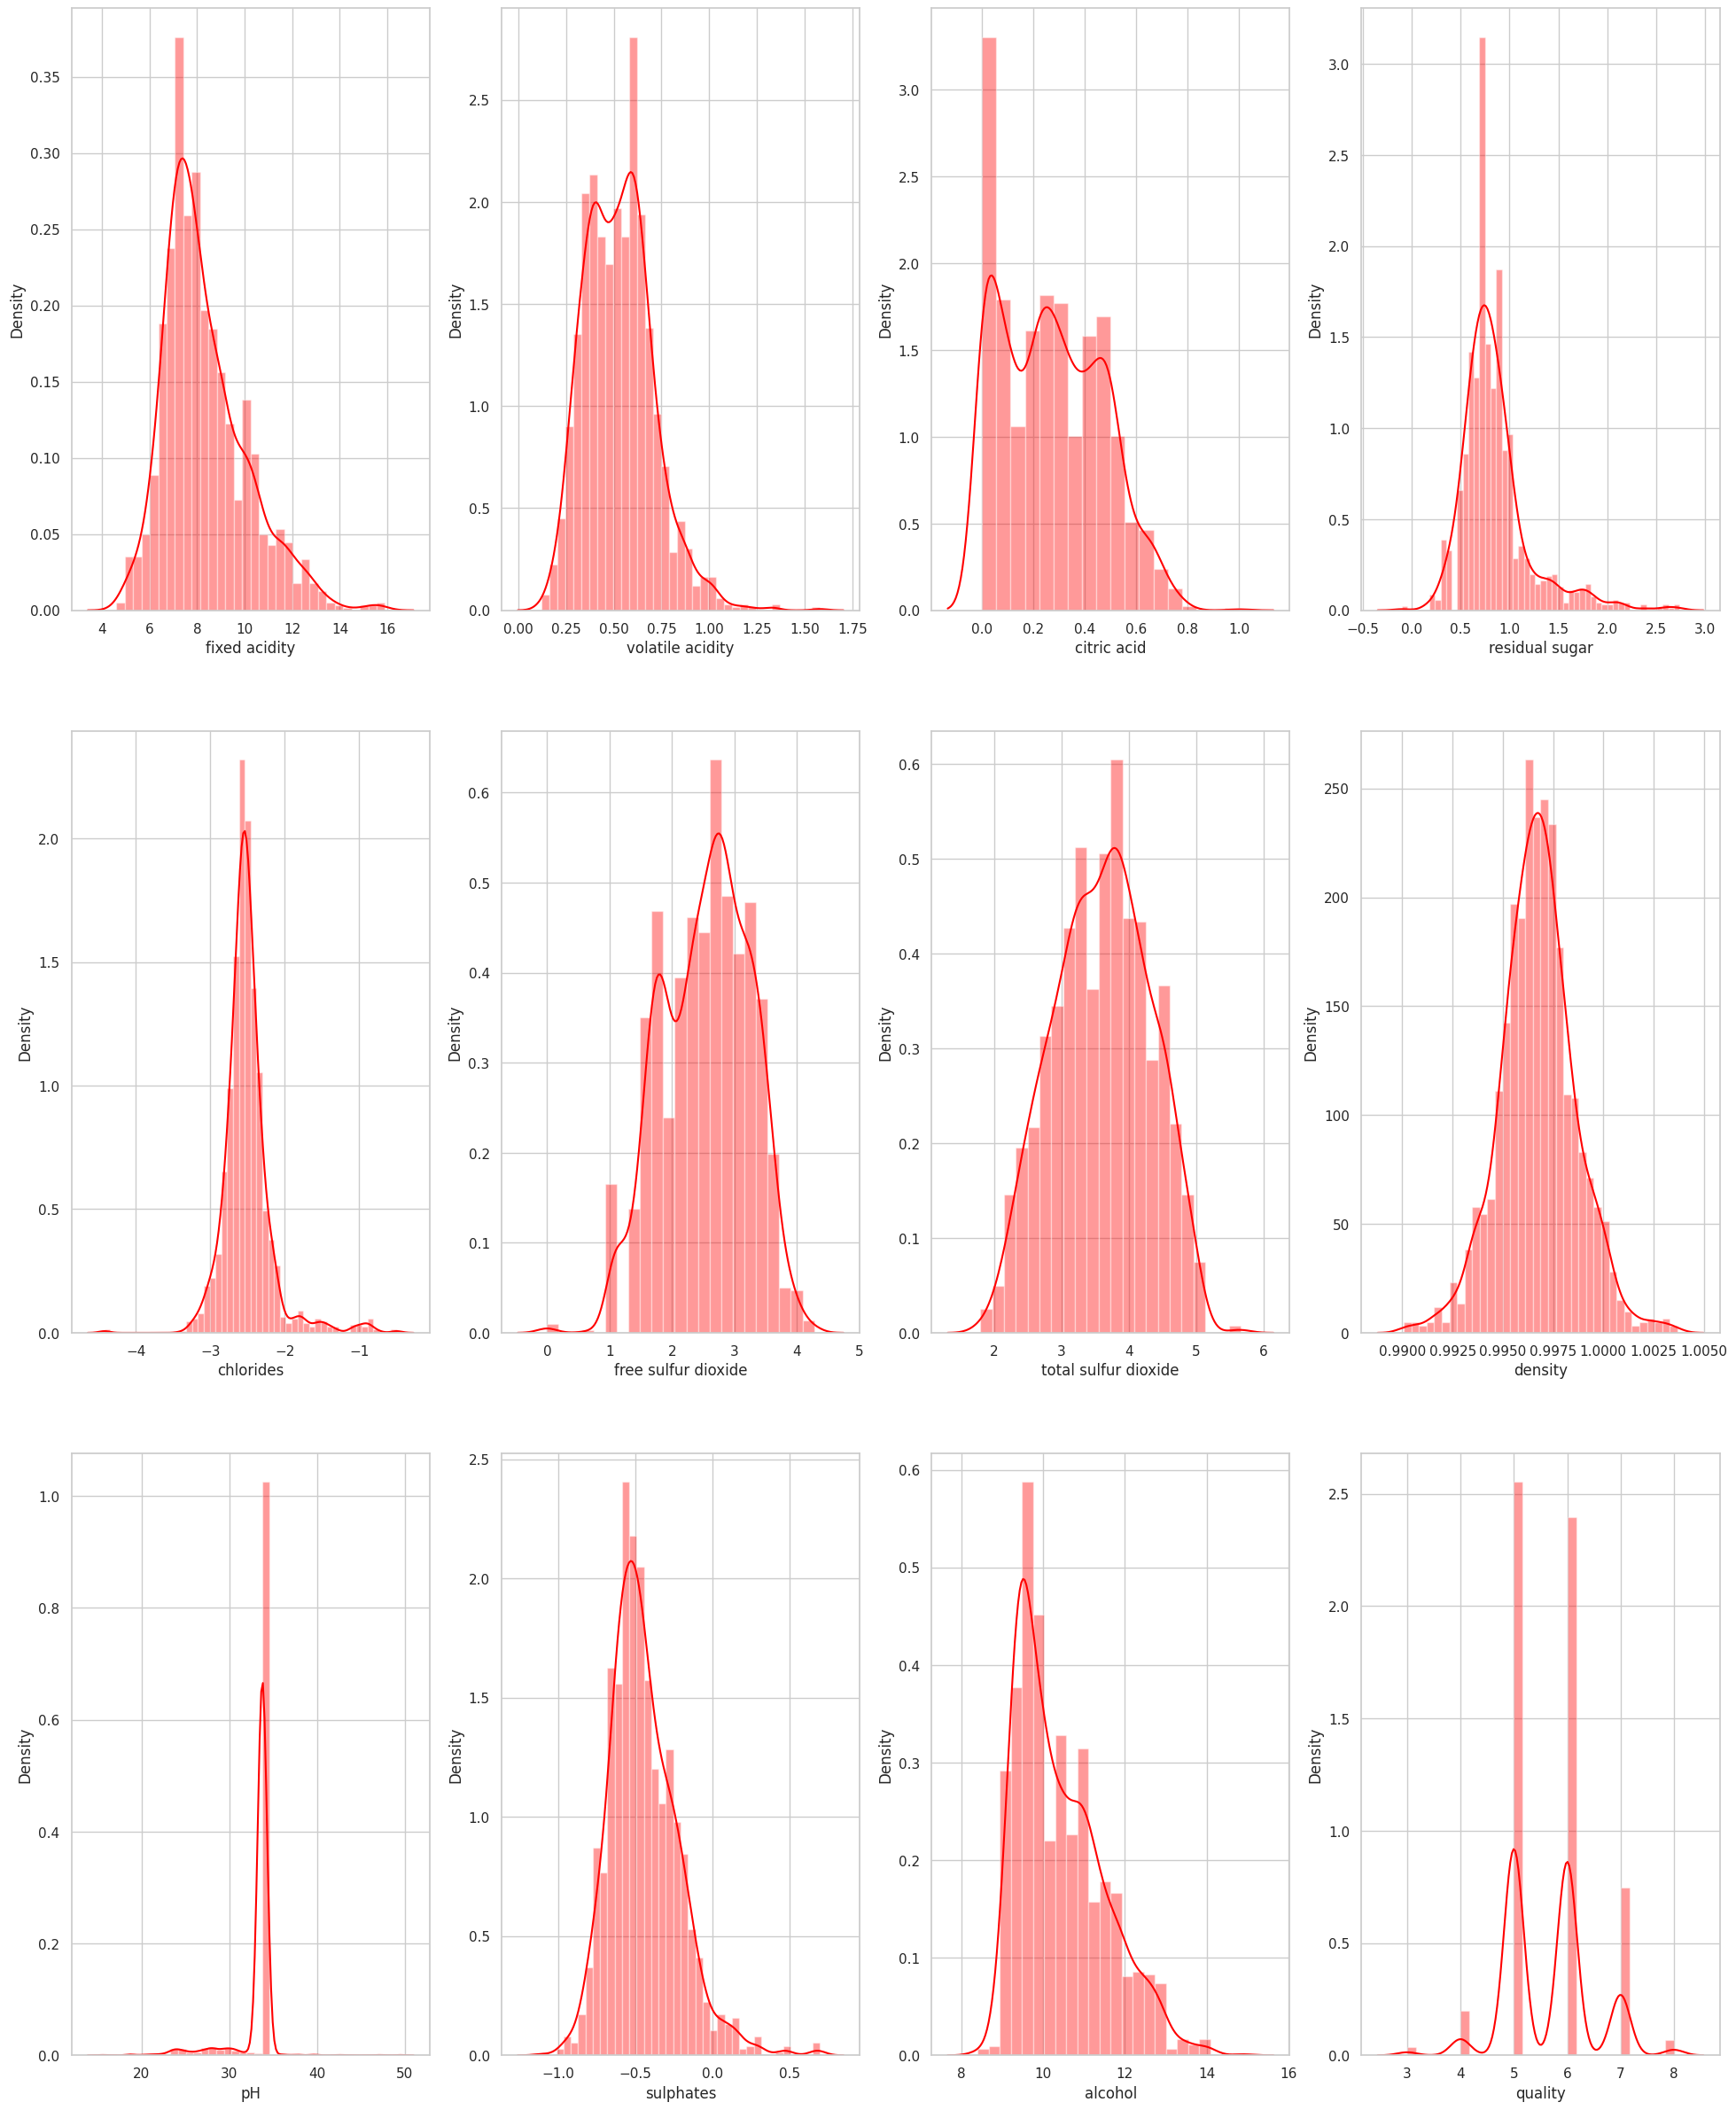

In [732]:
color = sns.color_palette("pastel")

# Create subplots
fig, ax1 = plt.subplots(3, 4, figsize=(24, 30))
k = 0
columns = list(df.columns)

# Iterate over subplots and columns to create distplots
for i in range(3):
    for j in range(4):
        # Ensure k is within the column index range
        if k < len(columns):
            sns.distplot(df[columns[k]], ax=ax1[i][j], color='red')
            k += 1

# Display the plots
plt.show()

In [733]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,0.641854,-2.577022,2.397895,3.526361,0.9978,33.448268,-0.579818,9.4,5.0
1,7.8,0.88,0.00,0.955511,-2.322788,3.218876,4.204693,0.9968,24.532530,-0.385662,9.8,5.0
2,7.8,0.76,0.04,0.832909,-2.385967,2.708050,3.988984,0.9970,26.049537,-0.430783,9.8,5.0
3,11.2,0.28,0.56,0.641854,-2.590267,2.833213,4.094345,0.9980,23.570596,-0.544727,9.8,6.0
4,7.4,0.70,0.00,0.641854,-2.577022,2.397895,3.526361,0.9978,33.448268,-0.579818,9.4,5.0


In [734]:
df_3 = df[df.quality==3]     # MINORITY
df_4 = df[df.quality==4]     # MINORITY
df_5 = df[df.quality==5]     # MAJORITY
df_6 = df[df.quality==6]     # MAJORITY
df_7 = df[df.quality==7]     # MINORITY
df_8 = df[df.quality==8]     # MINORITY

In [735]:
# Oversample MINORITY Class to make balance data :
from sklearn.utils import resample

df_3_upsampled = resample(df_3, replace=True, n_samples=600, random_state=12)
df_4_upsampled = resample(df_4, replace=True, n_samples=600, random_state=12)
df_7_upsampled = resample(df_7, replace=True, n_samples=600, random_state=12)
df_8_upsampled = resample(df_8, replace=True, n_samples=600, random_state=12)

# Decreases the rows of Majority one's to make balance data :
df_5_downsampled = df[df.quality==5].sample(n=600).reset_index(drop=True)
df_6_downsampled = df[df.quality==6].sample(n=600).reset_index(drop=True)

In [736]:
# Combine downsampled majority class with upsampled minority class
Balanced_df = pd.concat([df_3_upsampled, df_4_upsampled, df_7_upsampled,
                         df_8_upsampled, df_5_downsampled, df_6_downsampled]).reset_index(drop=True)


# Display new class counts
Balanced_df.quality.value_counts()

3.0    600
4.0    600
7.0    600
8.0    600
5.0    600
6.0    600
Name: quality, dtype: int64

<Axes: >

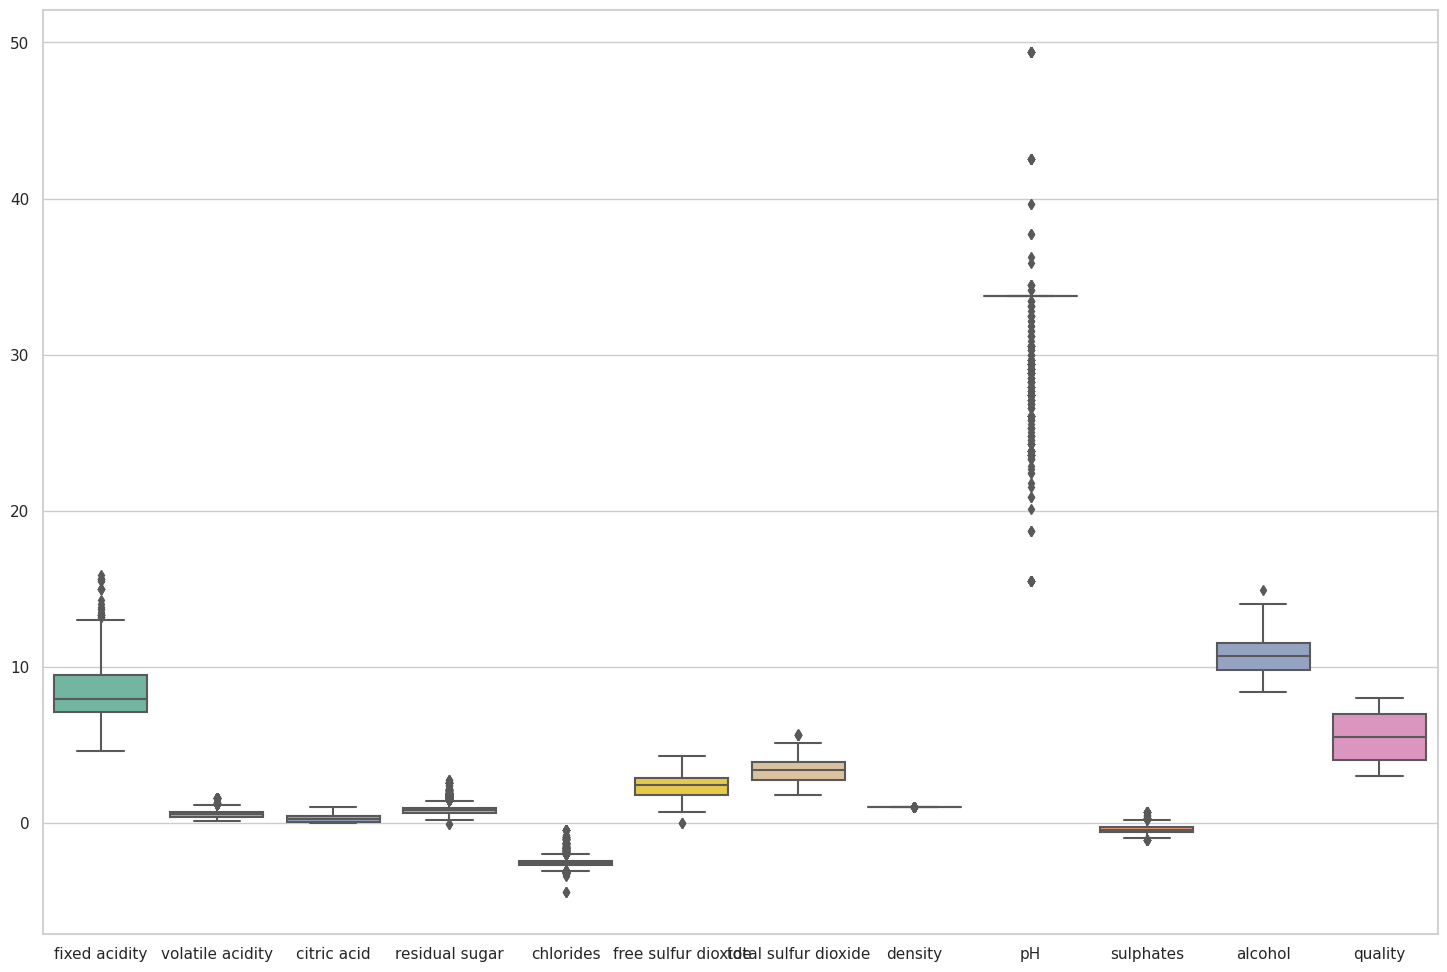

In [737]:
plt.figure(figsize=(18, 12))
sns.boxplot(data=Balanced_df, palette="Set2")

In [738]:
from sklearn.ensemble import IsolationForest
clf = IsolationForest(contamination=0.05, random_state=42) # You can adjust contamination based on your dataset
outliers = clf.fit_predict(Balanced_df.drop('quality', axis=1))

# Filter outliers from the dataset
Balanced_df = Balanced_df[outliers == 1]

<Axes: xlabel='quality', ylabel='alcohol'>

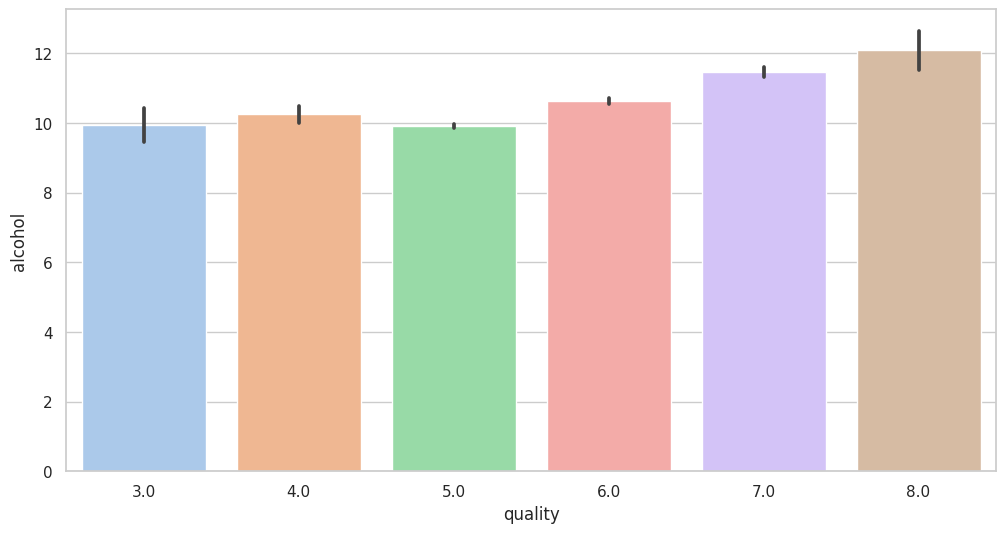

In [739]:
plt.figure(figsize = (12,6))
sns.barplot(x='quality', y = 'alcohol', data = df, palette = 'pastel')

Text(0, 0.5, 'Features')

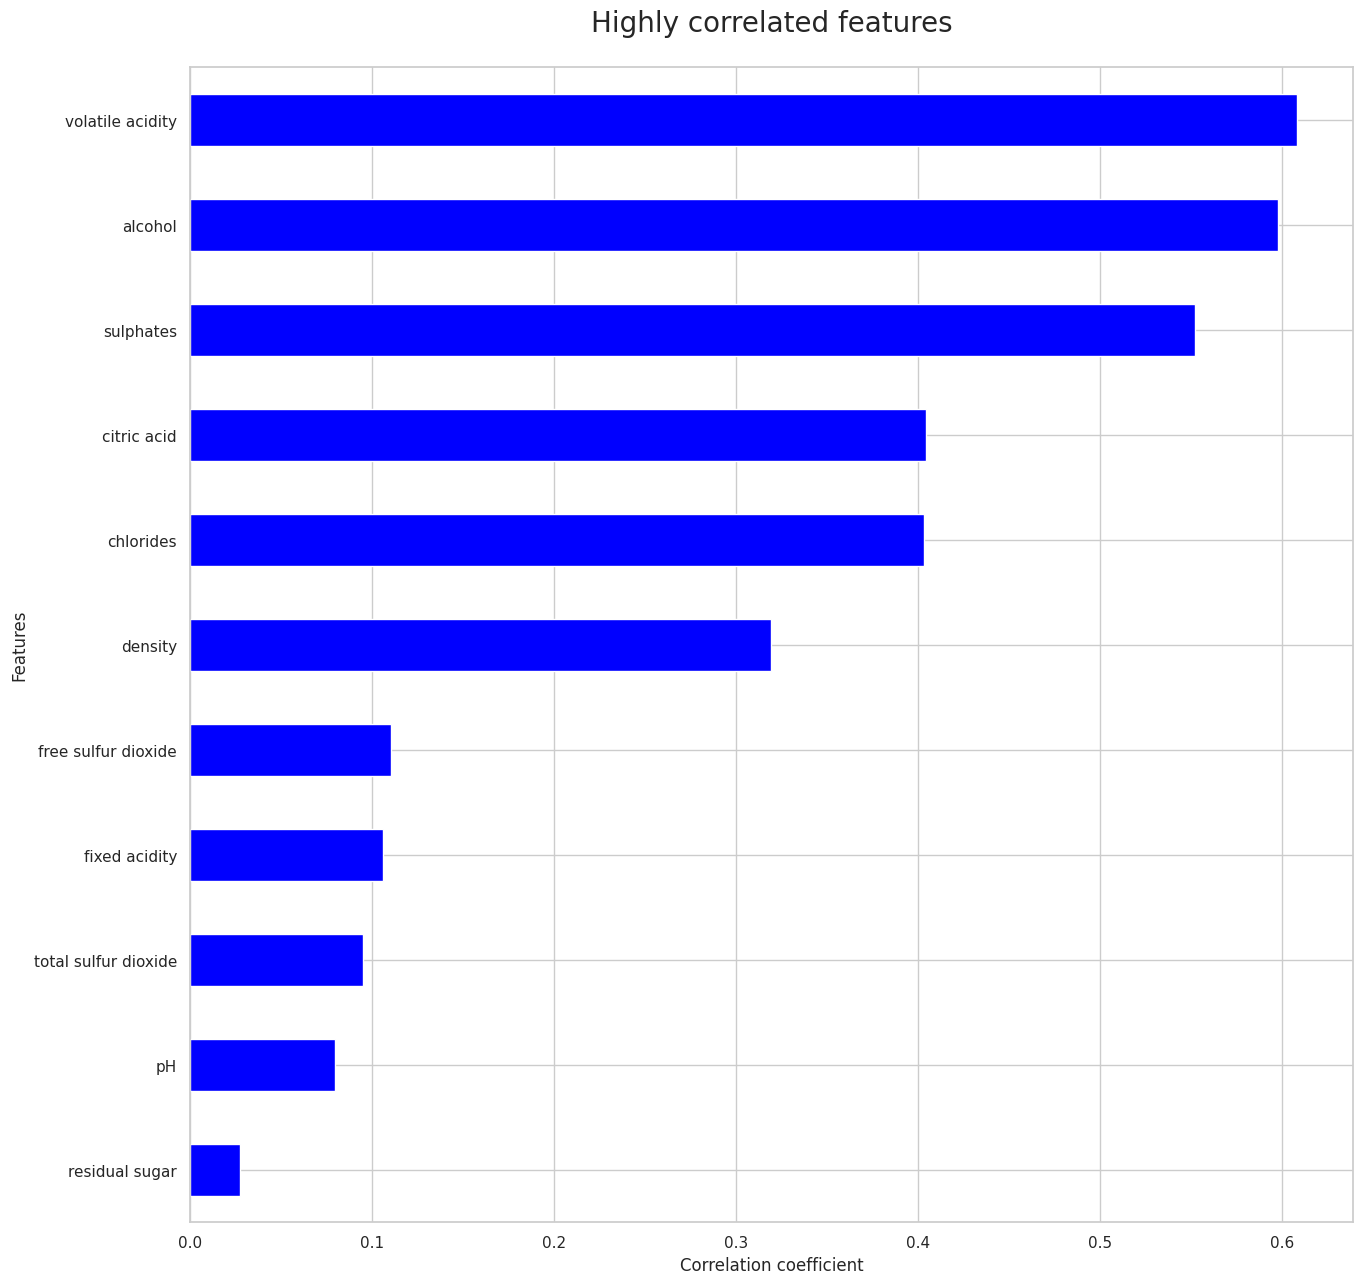

In [740]:
plt.figure(figsize=(15,15))
Balanced_df.corr().quality.apply(lambda x: abs(x)).sort_values(ascending=False).iloc[1:13][::-1].plot(kind='barh',color='blue')
plt.title("Highly correlated features", size=20, pad=26)
plt.xlabel("Correlation coefficient")
plt.ylabel("Features")

In [780]:
q1=Balanced_df.alcohol.quantile(0.25)
q3=Balanced_df.alcohol.quantile(0.75)

Balanced_df.alcohol.median()

10.7

In [781]:
iqr=q3-q1
ul=q3+1.5*iqr

<Axes: >

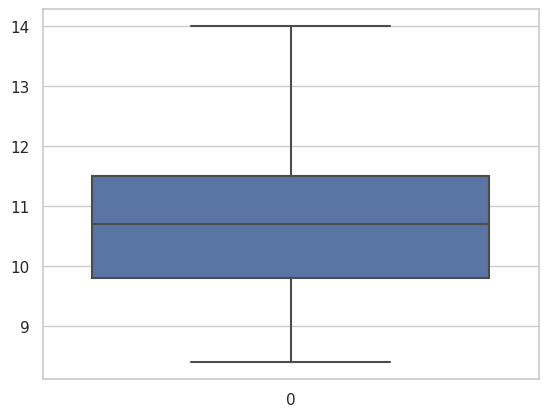

In [783]:
Balanced_df['alcohol']=np.where(Balanced_df['alcohol']>ul,10.7,Balanced_df['alcohol'])

sns.boxplot(Balanced_df.alcohol)

In [795]:
q1 = Balanced_df['volatile acidity'].quantile(0.25)
q3 = Balanced_df['volatile acidity'].quantile(0.75)

# Calculate the interquartile range (IQR)
iqr = q3 - q1

# Calculate the upper and lower bounds
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Replace outliers with the upper or lower bounds
Balanced_df['volatile acidity'] = Balanced_df['volatile acidity'].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))

In [796]:
selected_features = ['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides',
                     'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH',
                     'sulphates', 'alcohol']

In [797]:
X = Balanced_df[selected_features]
y = Balanced_df.quality

In [798]:
from sklearn.model_selection import train_test_split

# Splitting the data into 70% and 30% to construct Training and Testing Data respectively.
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2,random_state=13)

In [799]:
from sklearn.neighbors import KNeighborsClassifier
# For weights = 'uniform'
for n_neighbors in [5,10,15,20]:
    model = KNeighborsClassifier(n_neighbors)
    model.fit(X_train, y_train)
    scr = model.score(X_test, y_test)
    print("For n_neighbors = ", n_neighbors  ," score is ",scr)

For n_neighbors =  5  score is  0.8333333333333334
For n_neighbors =  10  score is  0.7909356725146199
For n_neighbors =  15  score is  0.7236842105263158
For n_neighbors =  20  score is  0.6812865497076024


In [800]:
# For weights = 'distance'
for n_neighbors in [5,10,15,20]:
    model = KNeighborsClassifier(n_neighbors, weights='distance')
    model.fit(X_train, y_train)
    scr = model.score(X_test, y_test)
    print("For n_neighbors = ", n_neighbors  ," score is ",scr)

For n_neighbors =  5  score is  0.8888888888888888
For n_neighbors =  10  score is  0.8771929824561403
For n_neighbors =  15  score is  0.8538011695906432
For n_neighbors =  20  score is  0.8494152046783626


In [801]:
# Creating a k-nearest neighbors Classifier
KNN_Model = KNeighborsClassifier(n_neighbors=5, weights='distance')

# Train the model using the training set
KNN_Model.fit(X_train, y_train)
results = KNN_Model.fit(X_train, y_train)

In [802]:
KNN_train_predictions = KNN_Model.predict(X_train)

In [803]:
KNN_test_predictions = KNN_Model.predict(X_test)

In [804]:
from sklearn.metrics import classification_report, confusion_matrix

print("\n Train Data: KNN_Confusion Matrix:\n ")
print(confusion_matrix(y_train, KNN_train_predictions))

print("\n Train Data: KNN_Classification Report:\n ")
print(classification_report(y_train, KNN_train_predictions))

print("\n \n Test Data: KNN_Confusion Matrix: \n ")
print(confusion_matrix(y_test, KNN_test_predictions))

print("\n Test Data: KNN_Classification Report:\n ")
print(classification_report(y_test, KNN_test_predictions))


 Train Data: KNN_Confusion Matrix:
 
[[478   0   0   0   0   0]
 [  0 416   0   0   0   0]
 [  0   0 452   0   0   0]
 [  0   0   0 475   0   0]
 [  0   0   0   0 452   0]
 [  0   0   0   0   0 463]]

 Train Data: KNN_Classification Report:
 
              precision    recall  f1-score   support

         3.0       1.00      1.00      1.00       478
         4.0       1.00      1.00      1.00       416
         5.0       1.00      1.00      1.00       452
         6.0       1.00      1.00      1.00       475
         7.0       1.00      1.00      1.00       452
         8.0       1.00      1.00      1.00       463

    accuracy                           1.00      2736
   macro avg       1.00      1.00      1.00      2736
weighted avg       1.00      1.00      1.00      2736


 
 Test Data: KNN_Confusion Matrix: 
 
[[122   0   0   0   0   0]
 [  0 117   0   0   0   0]
 [  0  10  83  18   6   0]
 [  1   5  15  62  15   5]
 [  0   0   0   1 111   0]
 [  0   0   0   0   0 113]]

 Test Dat

In [805]:
from sklearn.metrics import mean_squared_error,r2_score
r2 = r2_score(y_test, KNN_test_predictions)
print(f'R^2 Score: {r2}')
mse = mean_squared_error(y_test, KNN_test_predictions)
print(f'Mean Squared Error: {mse}')

R^2 Score: 0.9351987752878583
Mean Squared Error: 0.19298245614035087
